In [5]:
def svr():
    # Importing libraries
    import pandas as pd
    import numpy as np
    from datetime import datetime
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVR
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pickle
    import warnings 
    warnings.simplefilter('ignore')

    # Loading data
    df = pd.read_csv('SolarPrediction.csv')

    data = df

    # Converting UNIX time to datetime object
    data['Date']= pd.to_datetime(data['UNIXTime'],unit='s')

    # Setting the right timezone to the datetime object
    data['Date'] = data['Date'].dt.tz_localize('UTC').dt.tz_convert('HST')

    # Extracting date from Data column
    data['Data'] = pd.to_datetime(data['Data']).dt.date

    #Converting Sunrise and Sunset columns into datetime.time objects
    data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise']).dt.time
    data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet']).dt.time

    #Creating new sunset/sunrise columns featuring also the right date
    data['sunrise_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunRise']), axis = 1)
    data['sunset_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunSet']), axis = 1)

    #Adding approriate timezone
    data['sunrise_time'] = data['sunrise_time'].dt.tz_localize('HST')
    data['sunset_time'] = data['sunset_time'].dt.tz_localize('HST')

    # Setting Date as index, sorting and dropping columns
    data.set_index('Date', inplace = True)

    data.sort_index()

    data.drop(columns = ['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], inplace = True)

    # Converting sunrise and sunset times into timestamp
    data['sunrise_timestamp'] = data.apply(lambda row: datetime.timestamp(row['sunrise_time']), axis = 1)
    data['sunset_timestamp'] = data.apply(lambda row: datetime.timestamp(row['sunset_time']), axis = 1)

    # Creating a column containing the number of daily light hours
    data['Hours_of_light'] = (data['sunset_timestamp'] - data['sunrise_timestamp'])/60/60

    # Creating column describing current time relative to sunrise/sunset
    data['Rel_time'] = (data['UNIXTime']- data['sunrise_timestamp'])/(data['sunset_timestamp']-data['sunrise_timestamp'])

    # Removing non-necessary columns
    data.drop(columns = ['UNIXTime','sunrise_timestamp', 'sunset_timestamp', 
                         'sunset_time', 'sunrise_time'], inplace = True)

    # Modeling

    df = data

    # Splitting dfset into targets and features
    X = df.drop(columns = 'Radiation')
    y = df.Radiation

    # Splitting df into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling df
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Training models
    models = {'Support Vector Regression': SVR(kernel='rbf')}

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Evaluating performance
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Printing results
        print(f"{name}: R^2={r2:.3f}, MAE={mae:.3f}, RMSE={rmse:.3f}")

        # Plotting predicted vs. actual values
        plt.figure()
        sns.scatterplot(x=y_test, y=y_pred)
        plt.xlabel('Actual Solar Radiation')
        plt.ylabel('Predicted Solar Radiation')
        plt.title(name)


Support Vector Regression: R^2=0.645, MAE=107.428, RMSE=187.770
         6827905 function calls (6826564 primitive calls) in 52.221 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1   26.677   26.677   26.677   26.677 {sklearn.svm._libsvm.fit}
        1   19.963   19.963   19.963   19.963 {sklearn.svm._libsvm.predict}
       35    0.875    0.025    0.875    0.025 {pandas._libs.tslibs.vectorized.ints_to_pydatetime}
   196116    0.363    0.000    1.729    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\series.py:928(__getitem__)
  310/304    0.325    0.001    1.152    0.004 {built-in method numpy.array}
   196116    0.249    0.000    1.196    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\series.py:1034

  187/102    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:180(_invalidate_internal)
       30    0.000    0.000    0.009    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:3418(__getitem__)
        4    0.000    0.000    0.004    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arrays\datetimes.py:863(tz_localize)
      225    0.000    0.000    0.034    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dateutil\parser\_parser.py:1276(parse)
       19    0.000    0.000    0.002    0.000 C:\Users\srimo\AppData\Local\Package

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\range.py:160(_simple_new)
        1    0.000    0.000    0.003    0.003 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:824(_assign_variables_longform)
       24    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:1755(ravel)
        3    0.000    0.000    0.005    0.002 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py:4860(_reindex_with_indexers)
        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\

        2    0.000    0.000    0.001    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py:7223(notnull)
        3    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\markers.py:435(_set_circle)
       11    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axis.py:436(_get_text1_transform)
        3    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:578(set_linewidth)
        8    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoft

        7    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\computation\expressions.py:72(_can_use_numexpr)
        3    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:3410(_iter_column_arrays)
        5    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:2114(external_values)
       19    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1619(<lambda>)
        2    0.000    0.000    0.000    0.000 C:\Users\

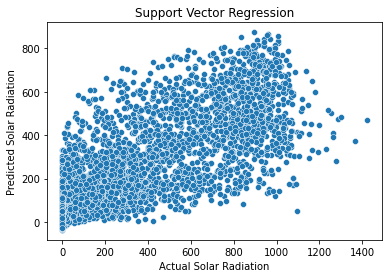

In [6]:
import cProfile,pstats

# Initializing profile class and calling rf function
profiler = cProfile.Profile()
profiler.enable()
svr()
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')

# Print the stats report
stats.print_stats()  

In [7]:
stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats()

         6827905 function calls (6826564 primitive calls) in 52.221 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   52.221   26.111 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3325(run_code)
        2    0.000    0.000   52.221   26.111 {built-in method builtins.exec}
        1    0.001    0.001   52.221   52.221 C:\Users\srimo\AppData\Local\Temp\ipykernel_13944\713578348.py:1(<cell line: 6>)
        1    0.024    0.024   52.220   52.220 C:\Users\srimo\AppData\Local\Temp\ipykernel_13944\1638940740.py:1(svr)
        1    0.000    0.000   26.682   26.682 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:139(fit)
        1    0.000    0.000   26.679   26.679 C:\

      384    0.000    0.000    0.001    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\locale.py:479(_parse_localename)
        8    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\managers.py:276(apply)
        4    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\spines.py:206(register_axis)
       10    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py:5704(_maybe_cast_listlike_indexer)
      491    0.000    0.000    0.001    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.

        8    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_base.py:965(get_yaxis_text2_transform)
        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\_config\config.py:412(__enter__)
        6    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(average)
        2    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:980(_combine_masks)
       16    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\ticker.py:2001

        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\core.py:3603(shrink_mask)
        5    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\numeric.py:176(_validate_dtype)
       29    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\numeric.py:296(_is_all_dates)
       32    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axis.py:551(locator)
        1    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFo

        3    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pytz\__init__.py:186(_unmunge_zone)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\common.py:196(all_none)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:1695(__init__)
        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:619(empty)
        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareF

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz
Support Vector Regression: R^2=0.645, MAE=107.428, RMSE=187.770
 
*** Profile stats marshalled to file 'C:\\Users\\srimo\\AppData\\Local\\Temp\\tmpoc7fq9d5'.
Embedding SnakeViz in this document...


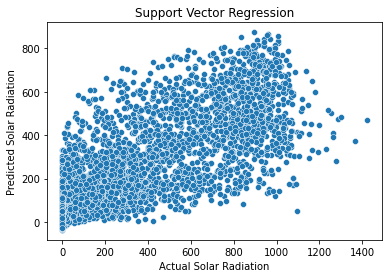

In [8]:
%load_ext snakeviz
%snakeviz svr()